# Зависимость дисперсии среднего от числа примеров в эксперименте (Домашнее задание)

### Цель: построить доверительный интервал для среднего значения для нормального закона.

In [18]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats as st

In [19]:
# Функция генерации экспериментов
def gen_experiments(mean=0, scale=10, n_samples=10, n_experiments=500):
    return np.random.normal(loc=mean,
                            scale=scale,
                            size=(n_experiments, n_samples))

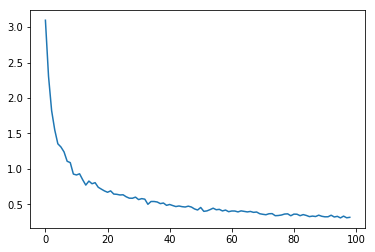

In [20]:
# TODO: оценить зависимость дисперсии 
#       от числа примеров в эксперименте
#       (построить график)
Stds = []

for n_samples in np.arange(10,1000,10):
    experiments = gen_experiments(n_samples=n_samples)
    means = [np.mean(exp) for exp in experiments]
    Stds.append(np.std(means))
plt.plot(Stds)    

## Доверительный интервал для среднего

In [21]:
# TODO: построить доверительный интервал для n_samples=10
#       при уровне значимости 0.975 (95%)
experiments = gen_experiments(n_samples=10)
means = [np.mean(exp) for exp in experiments]
m, std = np.mean(means), np.std(means) #среднее и дисперсия у исходного бин.распределения и у нормального (которым приближаем) одинаковая

confidence = 0.975
z = st.norm.ppf(confidence)
margin = z * std

print('interval: %s %s' % (m - margin, m + margin))

interval: -6.159806340654356 6.304432059351397


In [28]:
# TODO: провести эксперимент и показать корректность полученного интервала 
# (провести 100 экспериментов и убедиться, что примерно 95 средних из 100 попадают 
# в построенный доверительный интервал)
exp_test = gen_experiments(n_samples=10, n_experiments=100)
means = np.array([np.mean(exp) for exp in exp_test])
len(means[abs(means - m) < margin]) / len(means), len(means)

(0.91, 100)